# The Gibbs phenomenon

Let's load some useful packages and functions, as usual:


In [46]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [15, 9]

Below, we define the function $f(x)$, as well as the expressions for the $a_n$ and $b_n$ coefficients:


In [42]:
def f(x: float) -> float:
    if not -1 <= x <= 1:
        raise ValueError("x must be in [-1,1]")

    if x < 0:
        return x**2 - 1.0
    return 1.0 - x**2


def a(n: int) -> float:
    return 0.0


def b(n: int) -> float:
    return 2 / (n * np.pi) + 4 * (1 - (-1) ** n) / (n * np.pi) ** 3

With that, we can define the truncated Fourier series $S_N(x)$:


In [40]:
from collections.abc import Callable


def trigonometric_series_n(
    x: np.ndarray,
    N: int,
    a0: float,
    a: Callable[[int], float],
    b: Callable[[int], float],
) -> np.ndarray:
    s_n = a0 * np.ones(x.shape)
    for n in range(1, N + 1):
        s_n += a(n) * np.cos(n * np.pi * x) + b(n) * np.sin(n * np.pi * x)

    return s_n

We finally specify the remaining data:


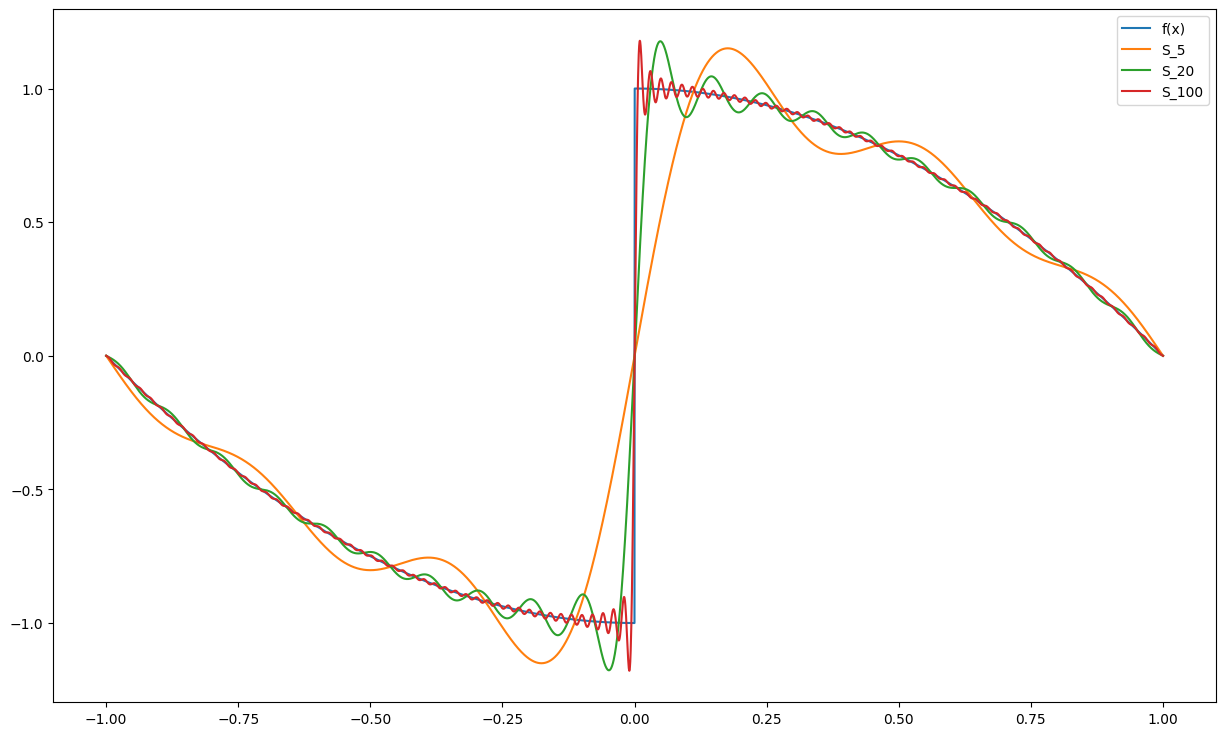

In [47]:
# Remaining problem data
a_0 = 0.0
x = np.linspace(-1, 1, 5000)
y = np.array([f(x_value) for x_value in x])

plt.plot(x, y, label="f(x)")
for N in (5, 20, 100):
    plt.plot(x, trigonometric_series_n(x, N, a_0, a, b), label=f"S_{N}")
plt.legend()
plt.show()

In [45]:
# Compute error
N = 1000
x = np.linspace(0, 1, 50000)
y = np.array([f(x_value) for x_value in x])
s_n = trigonometric_series_n(x, N, a_0, a, b)
overshoot = max(s_n - y)
print(f"{overshoot = }")

overshoot = 0.1789795810687156
